# 2D TFIM: Inference (10k samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#(5,5)
E_55 = -78.68568
mE_egru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_meanE.npy')
mE_hgru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_55 = np.load('../results/2DRNN_Nx=5_Ny=5_u=50_ns50_meanE.npy')
vE_egru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_varE.npy')
vE_hgru_55 = np.load('../results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_55 = np.load('../results/2DRNN_Nx=5_Ny=5_u=50_ns50_varE.npy')

#(7,7)
E_77 = -154.84631
mE_egru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_meanE.npy')
mE_hgru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_77 = np.load('../results/2DRNN_Nx=7_Ny=7_u=50_ns50_meanE.npy')
vE_egru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_varE.npy')
vE_hgru_77 = np.load('../results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_77 = np.load('../results/2DRNN_Nx=7_Ny=7_u=50_ns50_varE.npy')

#(8,8)
E_88 = -202.5077381
mE_egru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_meanE.npy')
mE_hgru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_88 = np.load('../results/2DRNN_Nx=8_Ny=8_u=50_ns50_meanE.npy')
vE_egru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_varE.npy')
vE_hgru_88 = np.load('../results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_88 = np.load('../results/2DRNN_Nx=8_Ny=8_u=50_ns50_varE.npy')

#(9,9)
E_99 = -256.55348
mE_egru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_meanE.npy')
mE_hgru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_99 = np.load('../results/2DRNN_Nx=9_Ny=9_u=50_ns50_meanE.npy')
vE_egru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_varE.npy')
vE_hgru_99 = np.load('../results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_99 = np.load('../results/2DRNN_Nx=9_Ny=9_u=50_ns50_varE.npy')

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_res_meanE(ax, Ee, e_list, last_saved_epoch, e_names, N, frange, legend_loc):
    ax.plot(np.arange(len(e_list[0])), e_list[0],color = 'blue', label = e_names[0])
    ax.plot(np.arange(len(e_list[1])), e_list[1], color = 'cyan',label = e_names[1])
    ax.plot(np.arange(len(e_list[2])), e_list[2], color = 'green', label = e_names[2])
    ax.axvline(x=last_saved_epoch[0],  ymax=0.4, color='magenta', linestyle='--', linewidth=2, label='1d-eGRU_bm')
    ax.axvline(x=last_saved_epoch[1], ymax=0.4, color='orange', linestyle='--', linewidth=2, label='1d-hGRU_bm')
    ax.axvline(x=last_saved_epoch[2], ymax=0.4, color='purple', linestyle='--', linewidth=2, label='2d-eRNN_bm')
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"$N_x$={N[0]}, $N_y$ = {N[1]}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="45%",
        height="35%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(np.arange(len(e_list[0])), e_list[0],color = 'blue', label = e_names[0])
    ax2.plot(np.arange(len(e_list[1])), e_list[1], color = 'cyan',label = e_names[1])
    ax2.plot(np.arange(len(e_list[2])), e_list[2], color = 'green', label = e_names[2])
    ax2.axvline(x=last_saved_epoch[0],  ymax=0.4, color='magenta', linestyle='--', linewidth=2, label='1d-eGRU_bm')
    ax2.axvline(x=last_saved_epoch[1], ymax=0.4, color='orange', linestyle='--', linewidth=2, label='1d-hGRU_bm')
    ax2.axvline(x=last_saved_epoch[2], ymax=0.4, color='purple', linestyle='--', linewidth=2, label='2d-eRNN_bm')
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

def plot_res_var(ax, v_list, e_names, N, frange, legend_loc):
    x = np.arange(len(v_list[0]))
    ax.plot(np.arange(len(v_list[0])), v_list[0],color = 'pink', label = e_names[0])
    ax.plot(np.arange(len(v_list[1])), v_list[1], color = 'purple',label = e_names[1])
    ax.plot(np.arange(len(v_list[2])), v_list[2], color = 'teal', label = e_names[2])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"$N_x$={N[0]}, $N_y$ = {N[1]}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(np.arange(len(v_list[0])), v_list[0],color = 'pink', label = e_names[0])
    ax2.plot(np.arange(len(v_list[1])), v_list[1], color = 'purple',label = e_names[1])
    ax2.plot(np.arange(len(v_list[2])), v_list[2], color = 'teal', label = e_names[2])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

In [5]:
#Last saved epoch corresponding to the best model
#The matrix below has the form : (eRNN, eGRU, hGRU) as columns, N=(5,5), (7,7), (8,8), (9,9) as rows
#Total training epochs is 400 for 1d NQS, 200 for 2d eRNN for  N=(5,5)
#Total training epochs is 450 for 1d NQS, 350 for 2d eRNN for  N=(7,7)
#Total training epochs is 350 for 1d NQS and  2d eRNN for  N=(8,8), (9,9)
#Data from training notebooks 
bm = np.array([[373,309,170],[329,351,286],[350,350,249],[324,337,332]])
print(bm)
print(f'For N=(5,5), best model for 1d-eGRU is saved at epoch {bm[0,0]}/400, for 1d-hGRU is at {bm[0,1]}/400, and for 2d-eRNN is {bm[0,2]}/200')
print(f'For N=(7,7), best model for 1d-eGRU is saved at epoch {bm[1,0]}/450, for 1d-hGRU is at {bm[1,1]}/450, and for 2d-eRNN is {bm[1,2]}/350')
print(f'For N=(8,8), best model for 1d-eGRU is saved at epoch {bm[2,0]}/350, for 1d-hGRU is at {bm[2,1]}/350, and for 2d-eRNN is {bm[2,2]}/350')
print(f'For N=(9,9), best model for 1d-eGRU is saved at epoch {bm[3,0]}/350, for 1d-hGRU is at {bm[3,1]}/350, and for 2d-eRNN is {bm[3,2]}/350')

[[373 309 170]
 [329 351 286]
 [350 350 249]
 [324 337 332]]
For N=(5,5), best model for 1d-eGRU is saved at epoch 373/400, for 1d-hGRU is at 309/400, and for 2d-eRNN is 170/200
For N=(7,7), best model for 1d-eGRU is saved at epoch 329/450, for 1d-hGRU is at 351/450, and for 2d-eRNN is 286/350
For N=(8,8), best model for 1d-eGRU is saved at epoch 350/350, for 1d-hGRU is at 350/350, and for 2d-eRNN is 249/350
For N=(9,9), best model for 1d-eGRU is saved at epoch 324/350, for 1d-hGRU is at 337/350, and for 2d-eRNN is 332/350


/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_1728/4146577562.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('2dTFIM_all_N_ns50_nu50.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


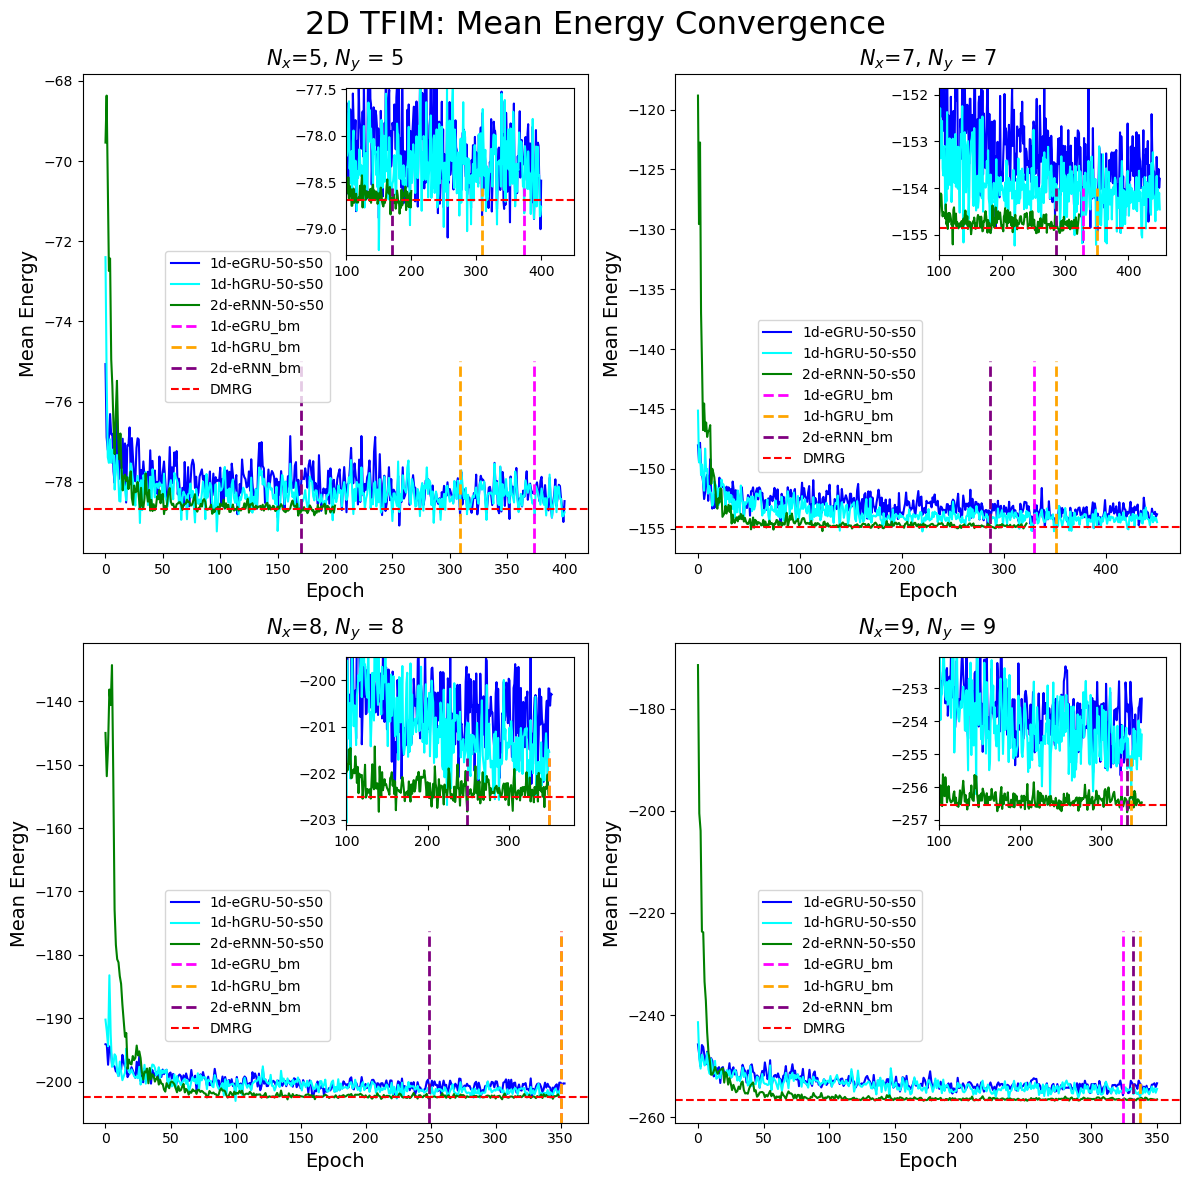

In [6]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list55 = [mE_egru_55,  mE_hgru_55, mE_e2gru_55]
e_list77 = [mE_egru_77,  mE_hgru_77, mE_e2gru_77]
e_list88 = [mE_egru_88,  mE_hgru_88, mE_e2gru_88]
e_list99 = [mE_egru_99,  mE_hgru_99, mE_e2gru_99]

e_names = ['1d-eGRU-50-s50', '1d-hGRU-50-s50', '2d-eRNN-50-s50']
plot_res_meanE(ax[0,0], E_55, e_list55,bm[0], e_names, [5,5], [100,450, E_55-0.6, E_55+1.2], (0.15, 0.3, 0.3, 0.2))
plot_res_meanE(ax[0,1], E_77, e_list77,bm[1], e_names, [7,7], [100,460, E_77-0.6, E_77+3.0], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,0], E_88, e_list88, bm[2],e_names, [8,8], [100,380, E_88-0.6, E_88+3.0], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], E_99, e_list99,bm[3], e_names, [9,9], [100,380, E_99-0.6, E_99+4.5], (0.15, 0.3, 0.8, 0.2))


plt.suptitle('2D TFIM: Mean Energy Convergence', fontsize = 23)
plt.savefig('2dTFIM_all_N_ns50_nu50.png')

Text(0.5, 0.98, '2D TFIM: Energy Variance Convergence')

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


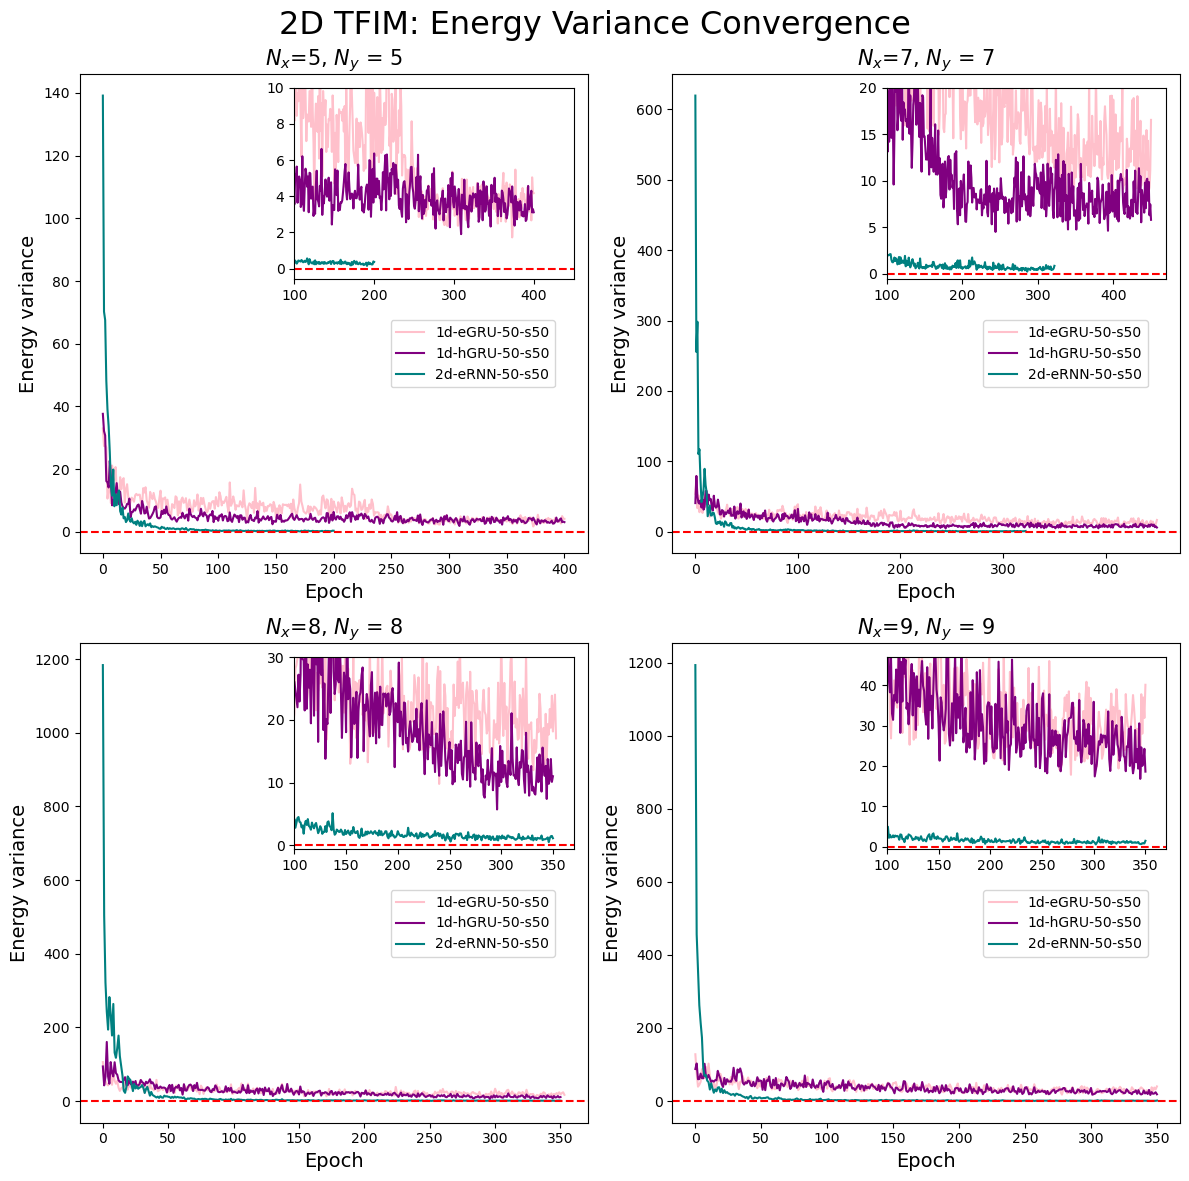

In [7]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list55 = [vE_egru_55,  vE_hgru_55, vE_e2gru_55]
e_list77 = [vE_egru_77,  vE_hgru_77, vE_e2gru_77]
e_list88 = [vE_egru_88,  vE_hgru_88, vE_e2gru_88]
e_list99 = [vE_egru_99,  vE_hgru_99, vE_e2gru_99]

e_names = ['1d-eGRU-50-s50', '1d-hGRU-50-s50', '2d-eRNN-50-s50']
plot_res_var(ax[0,0], e_list55, e_names, [5,5], [100,450, -0.6, 10.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[0,1], e_list77, e_names, [7,7], [100,470, -0.6, 20.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,0], e_list88, e_names, [8,8], [100,370, -0.6, 30.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,1], e_list99, e_names, [9,9], [100,370, -0.6, 47.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('2D TFIM: Energy Variance Convergence', fontsize = 23)
#plt.savefig('2dTFIM_all_N_ns50_nu50_var.png')